# Modelling with Python
## 21/05/2015 
### Jens Hahn

## 1. Continuous deterministic modelling
### Ordinary differential equations (ODE)

In this first part, we want to have a look on ODE models. These models are deterministic, meaning every simulation
will get you the same results, the future of the system is only determined by the initial values you set.   
Besides that, these models use continuous values, not integers.    
Maybe you're wondering how these models could possibly describe biology? Well, you can use this method for concentrations and very large numbers, for example in *metabolism*. 

### Let's start
We begin with a very simple reaction, a molecule A and a molecule B react to a molecule C in a reversible reaction:
$$\textrm{A} + \textrm{B} \rightleftharpoons \textrm{C}$$

#### Kinetic Rate Law
What we will need know is a formalism to describe this reaction, probably you have already heard about **Michaelis-Menten kinetics**. Nonetheless, here we want to start with the easiest possible reaction type: **Mass Action Kinetics**. You just multiply the concentrations of the reaction partners and a parameter describing the kinetic of the reaction.
The forward reaction is $\textrm{A} + \textrm{B} \rightarrow \textrm{C}$ so we can define a reaction $\textrm{v}_1$:
$$\textrm{v}_1 = [\textrm{A}] \times [\textrm{B}] \times \textrm{k}_1$$
we do the same for the backward reaction:
$$\textrm{v}_2 = [\textrm{C}] \times \textrm{k}_2$$

#### Reactions Equations
Now we want to write down the *differential equations* themselves. 
Let's start with the changing rate of the concentration of species A:
$$\frac{\textrm{d}[A]}{\textrm{dt}} = - \textrm{v}_1 + \textrm{v}_2$$
Got the idea? Then write down the equations for B and C on your own.

#### Simulation algoritm
Simple *Euler* method:
Maybe you already know about this method, otherwise I will give you some hints. 
The differential equation describes the change of a species in an infinitesimal small time step. You want to simulate it 
numerically, that means, you want to have a quite reasonable approximation to the solution. 
I don't want to spoil everything, but what will happen when you multiply both sides of the equation with a small time step? 

The only thing missing now are the initial values and parameter values for out model. Well, here they are:
Initial Values
$$[A](0) = 3.0 \textrm{ mM}$$
$$[B](0) = 2.0 \textrm{ mM}$$
$$[C](0) = 2.5 \textrm{ mM}$$

$$\textrm{k}_1 = 0.2 \ \frac{1}{\textrm{mM}\times\textrm{s}}$$

$$\textrm{k}_2 = 0.1 \ \frac{1}{\textrm{mM}}$$


#### Python
Let's start the simulation. We begin with defining the initial states and the paramters:

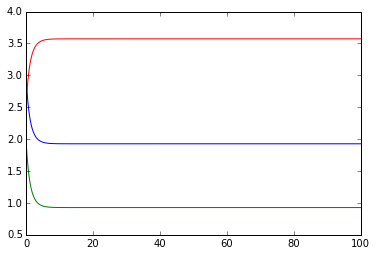

In [47]:
import numpy as np
%matplotlib inline 
from pylab import *

# initial parameters
A=3.0; B=2.0; C=2.5
k1=0.2; k2=0.1
time=0
step=0.1
timemax=100

# initialise solutions for plotting
solutions=[[time],[A],[B],[C]]

#function to return changes
def changes (a_ini,b_ini,c_ini,t0,tstep,solutions):
    ab_ch=(-k1*a_ini*b_ini+k2*c_ini)*tstep
    c_ch=(k1*a_ini*b_ini-k2*c_ini)*tstep
    solutions[0].append(t0+tstep)
    solutions[1].append(a_ini+ab_ch)
    solutions[2].append(b_ini+ab_ch)
    solutions[3].append(c_ini+c_ch)
    return solutions

# simulation loops
for i in np.arange (time,timemax,step):
    changes(solutions[1][-1],solutions[2][-1],solutions[3][-1],solutions[0][-1],step,solutions)
#print solutions

# plotting of results1
plot(solutions[0],solutions[1])
plot(solutions[0],solutions[2])
plot(solutions[0],solutions[3])

Now it's your turn! What do we need to simulate our model for... let's say 100 seconds?

Here some help:
1. The simulation time
2. Lists to save the simulation results
3. A function to update the concentrations (based on the reactions)
4. A loop to start the function again and again
5. Some **matplotlib** to visualise the results